In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

In [3]:
depth_whole = pd.read_csv("/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_22.7/depth_estimation.csv")
depth_whole

,index,x,y,z,Unnamed: 4
0,22,3.863790,-0.300834,24.242172,NaN
1,22,3.668833,-0.406115,24.266020,NaN
2,22,4.028350,-0.445679,24.177361,NaN
3,22,3.498969,-0.437518,23.441299,NaN
4,22,3.701853,-0.464298,24.252441,NaN
...,...,...,...,...,...
606,211,3.270584,-0.313255,21.215094,NaN
607,211,3.252610,-0.345810,21.118303,NaN
608,212,3.241281,-0.463993,21.031668,NaN
609,212,3.279276,-0.358126,20.950552,NaN


In [4]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

# cond = z < 40
# x = x[cond]
# y = y[cond]
# z = z[cond]
# index = index[cond]


In [5]:
font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 16,
}

In [6]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

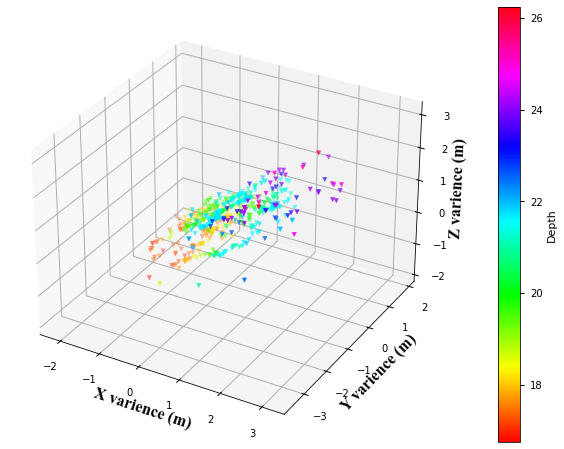

In [7]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[20,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(standardization(x), standardization(y), standardization(z), marker = "v", c=z, cmap="hsv")

ax.set_xlabel('X varience (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y varience (m)', font=font1)
ax.set_zlabel('Z varience (m)', font=font1)
fig.colorbar(p2,label="Depth")

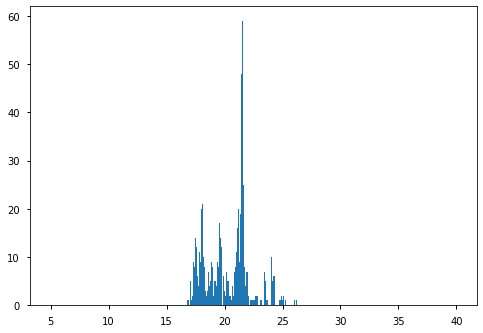

In [8]:
style.use('seaborn-notebook')
n, bins_limits, patches = plt.hist(z, bins=400,range=[5,40])

In [9]:
# find the mid value
sort_z = np.sort(z)
mid = sort_z[int(sort_z.size/2)]
mid

20.930921555

In [10]:
# calculate the sigma
sigma = np.sqrt(1/z.size * np.sum((z-mid)**2))
sigma

2.0245581307618528

In [11]:
lb = mid - 3 * sigma
ub = mid + 3 * sigma
cull_cond = np.logical_and(z>lb, z<ub)
z_refine = z[cull_cond]

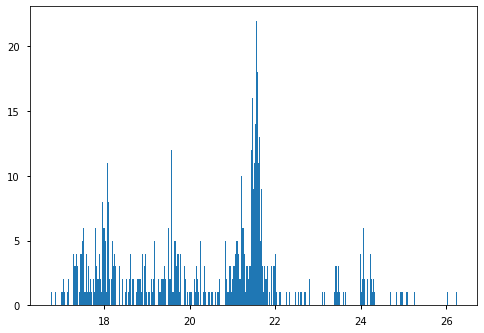

In [12]:
style.use('seaborn-notebook')
n, bins_limits, patches = plt.hist(z_refine, bins=400)

In [13]:
sort_refine_z = np.sort(z_refine)
refine_mid = sort_refine_z[int(sort_refine_z.size/2)]
refine_mid

20.930921555